In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import turicreate

In [4]:
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


#EXPLORATION SUMMARY
1) Dataframe consists of 9827 rows and 9 columns.
2) No NaNs or duplicated values.
3) Release_Date columns needs to be casted into Date-time and to extract only the year value.
4) Overview,Original_Language and Poster_Url won't be so useful, so we will drop them.
5) There are noticeable outliers in Popularity column.
6) Voter_average better be categorized for proper analysis.
7) Genre columns has comma separated values and white spaces that needs to be handled and casted into category.


Year with most filmed movies?

In [10]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [11]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [12]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [13]:
cols=['Overview','Original_Language','Poster_Url']

In [14]:
df.drop(cols,axis=1,inplace=True)

In [15]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [16]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**Categorizing Vote_Average column**
Instead of the values we will divide it in 4 categories:'popular','average','below_avg','not_pop'to describe it more effeciently

In [17]:
def categorize_col(df, col, labels):
    edges=[df[col].describe()['min'], 
           df[col].describe()['25%'], 
           df[col].describe()['50%'], 
           df[col].describe()['75%'], 
           df[col].describe()['max']] 
    df[col]=pd.cut(df[col], edges, labels=labels,duplicates='drop') 
    return df

In [18]:
labels = ['not_popular','below_avg','average','popular']
df = categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [19]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [20]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

#we'd split genres into list and then explode our df to have only one genre per row for each movie

In [21]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [22]:
df.dropna(inplace=True)
df.isna().sum()


Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [23]:
#casting column into category
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25552 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 949.1+ KB


In [25]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

*DATA VISUALIZATION*

In [26]:
sns.set_style('whitegrid')

#The most frequent genre of movies released on Netflix?

In [27]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

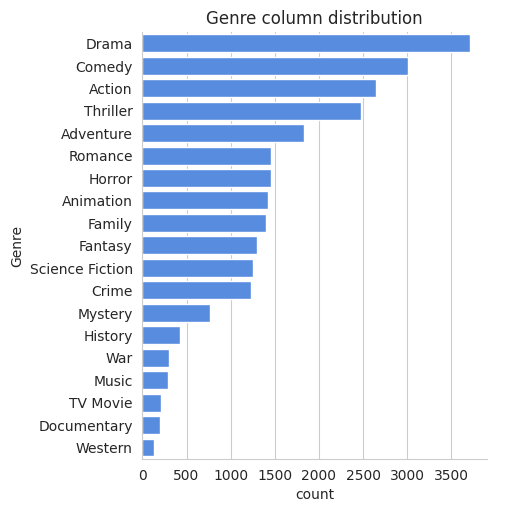

In [28]:
sns.catplot(y='Genre',data=df,kind='count',
            order=df['Genre'].value_counts().index,
            color='#4287f5')
plt.title('Genre column distribution')
plt.show()

#which has the highest votes in vote_avg column?

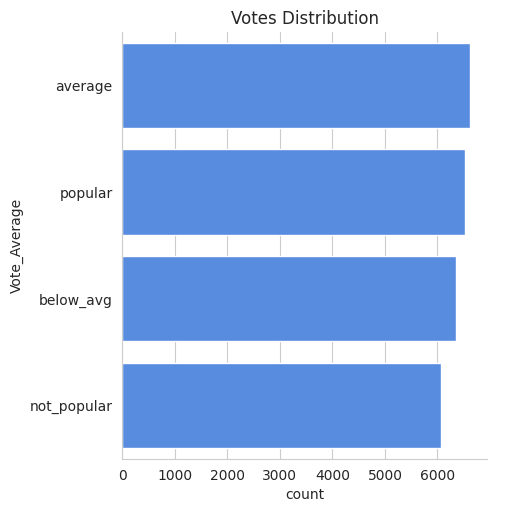

In [29]:
sns.catplot(y='Vote_Average',data=df,kind='count',
            order=df['Vote_Average'].value_counts().index,
            color='#4287f5')
plt.title('Votes Distribution')
plt.show()

#which movie is the most popular and is of which genre?

In [30]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


#which movie is the least popular and is of which genre?

In [31]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


#which year has the most filmed movies?

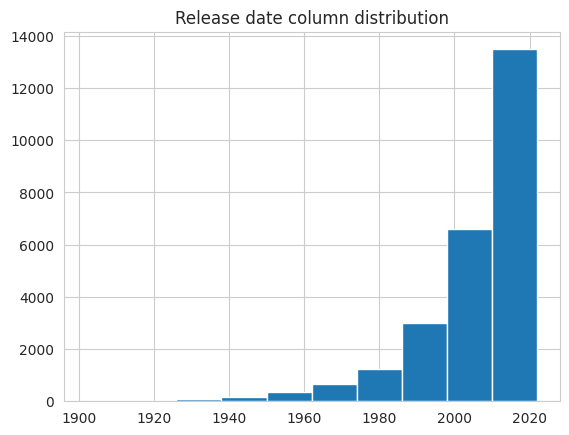

In [32]:
df['Release_Date'].hist()
plt.title('Release date column distribution')
plt.show()

**Predict the movie rating (Vote_Average) based on popularity, number of votes, genre and release year.**

In [35]:
import turicreate as tc

sf = tc.SFrame("mymoviedb.csv")
train_set, test_set = sf.random_split(0.8, seed=0)


Successfully parsed 3 tokens: 
	0: 2013-10-20
	1: Pixie Hollow Bake Off
	2: Tink chall ... ni-Shorts:

Successfully parsed 1 tokens: 
	0: - Just Desserts

Successfully parsed 1 tokens: 
	0: - If The Hue Fits

Successfully parsed 1 tokens: 
	0: - Dust Up

Successfully parsed 1 tokens: 
	0: - Scents A ... ensibility

Successfully parsed 1 tokens: 
	0: - Just One ...  The Girls

Successfully parsed 1 tokens: 
	0: - Volleybug

Successfully parsed 1 tokens: 
	0: - Hide And Tink

Successfully parsed 1 tokens: 
	0: - Rainbow's Ends

Successfully parsed 1 tokens: 
	0: - Fawn And Games

11 lines failed to parse correctly

Finished parsing file /mnt/c/Users/saumy/Downloads/mymoviedb.csv

Parsing completed. Parsed 100 lines in 0.338325 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,int,float,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Successfully parsed 3 tokens: 
	0: 2013-10-20
	1: Pixie Hollow Bake Off
	2: Tink chall ... ni-Shorts:

Successfully parsed 1 tokens: 
	0: - Just Desserts

Successfully parsed 1 tokens: 
	0: - If The Hue Fits

Successfully parsed 1 tokens: 
	0: - Dust Up

Successfully parsed 1 tokens: 
	0: - Scents A ... ensibility

Successfully parsed 1 tokens: 
	0: - Just One ...  The Girls

Successfully parsed 1 tokens: 
	0: - Volleybug

Successfully parsed 1 tokens: 
	0: - Hide And Tink

Successfully parsed 1 tokens: 
	0: - Rainbow's Ends

Successfully parsed 1 tokens: 
	0: - Fawn And Games

11 lines failed to parse correctly

Finished parsing file /mnt/c/Users/saumy/Downloads/mymoviedb.csv

Parsing completed. Parsed 9826 lines in 0.252819 secs.

In [39]:
my_features=['Popularity','Vote_Count','Release_Date','Genre']

In [40]:
my_features_model=tc.linear_regression.create(train_set,target='Vote_Average',features=my_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 7898

Number of features          : 4

Number of unpacked features : 4

Number of coefficients    : 7117

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

| 0         | 3        | 5.000000  | 0.020097     | 10.922046          | 2.738618                        |

| 1         | 7        | 1.250000  | 0.046809     | 17.671893          | 0.936571                        |

| 2         | 9        | 1.041387  | 0.062001     | 12.106289          | 0.606911                        |

| 3         | 10       | 1.041387  | 0.072723     | 5.251115           | 0.469721                        |

| 4         | 11       | 1.041387  | 0.089963     | 5.486689           | 0.438943                        |

| 9         | 26       | 1.958454  | 0.201617     | 5.469082           | 0.390545                        |

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

In [41]:
print (my_features_model.evaluate(test_set))

{'max_error': 9.026318584369005, 'rmse': 2.2565686983200655}


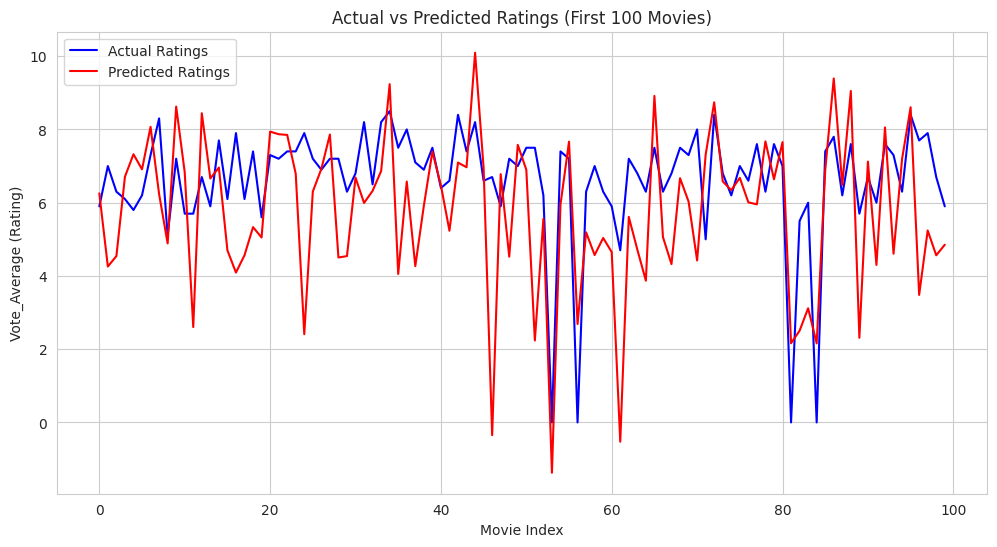

In [42]:
y_true = test_set['Vote_Average']
y_pred = my_features_model.predict(test_set)

# ---------------- Line Plot ----------------
plt.figure(figsize=(12,6))
plt.plot(y_true[:100].to_numpy(), label='Actual Ratings', color='blue')
plt.plot(y_pred[:100], label='Predicted Ratings', color='red')
plt.title("Actual vs Predicted Ratings (First 100 Movies)")
plt.xlabel("Movie Index")
plt.ylabel("Vote_Average (Rating)")
plt.legend()
plt.show()

**Recommend movies with similar descriptions/genres.**

In [56]:
sf['user_id'] = sf['Title']

In [62]:
sf['combined'] = sf['Overview'].fillna('') + ' ' + sf['Genre'].fillna('')

# Step 2: Turn text into word count (bag of words)
sf['word_count'] = tc.text_analytics.count_words(sf['combined'])

# Step 3: Build item similarity recommender
# Trick: use Title as both user_id and item_id
personalized_model = tc.item_similarity_recommender.create(
    sf,
    user_id='user_id',
    item_id='Title',
    item_data=sf[['Title', 'word_count']],
    similarity_type='cosine'
)

Warning: Ignoring columns Release_Date, Overview, Popularity, Vote_Count, Vote_Average, Original_Language, Genre, Poster_Url, overview_wc, combined, word_count;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 9826 observations with 9512 users and 9512 items.

Data prepared in: 0.465154s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.058ms                        | 10.5       |

| 5.064ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 898.717ms                           | 0                | 1               |

| 2.05s                               | 100              | 9512            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 2.05935s

In [63]:
recommendations = personalized_model.recommend(users=['Avatar'], k=5)
print(recommendations)

+---------+----------------------+--------------------+------+
| user_id |        Title         |       score        | rank |
+---------+----------------------+--------------------+------+
|  Avatar | Alice in Wonderland  |        1.0         |  1   |
|  Avatar | Beauty and the Beast |        1.0         |  2   |
|  Avatar |        Awake         | 0.6666666666666666 |  3   |
|  Avatar |      Cinderella      | 0.6666666666666666 |  4   |
|  Avatar |  The Little Mermaid  | 0.6666666666666666 |  5   |
+---------+----------------------+--------------------+------+
[5 rows x 4 columns]

